In [1]:
import numpy as np
import matplotlib.pyplot as plt

from psychometric import weibull
from quest_plus import QuestPlus

%matplotlib inline

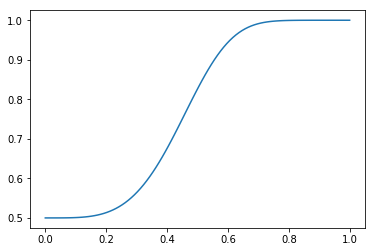

In [2]:
# contruct actual psychometric function:
x = np.linspace(0, 1, num=100)

threshold = 0.45
slope = 4.
prob_correct = weibull(x, [threshold, slope])

plt.plot(x, prob_correct)

In [3]:
# construct stimulus and parameter space for QuestPlus
stim_space = np.arange(0.05, 1.05, 0.05)
thresholds = stim_space.copy()
slopes = np.arange(0.5, 15, 0.5)

qp = QuestPlus(stim_space, [thresholds, slopes], function=weibull)

In [4]:
# create a function that draws from the psychometric function:
def draw_from(stimulus_value, params, function=weibull):
    prob = function(stimulus_value, params)
    return np.random.choice([0, 1], p=[1 - prob, prob])

In [5]:
draw_from(0.5, [threshold, slope])

1

In [10]:
draw_from(0.25, [threshold, slope])

0

In [11]:
# fit quest plus for 25 simulated trials:
contrast = 0.5
for trial in range(25):
    response = draw_from(contrast, [threshold, slope])
    qp.update(contrast, response)
    contrast = qp.next_contrast()

C:\proj\src\QuestPlus\quest_plus.py:109: RuntimeWarning: divide by zero encountered in log
  H = -np.nansum(full_posterior * np.log(full_posterior), axis=1)
C:\proj\src\QuestPlus\quest_plus.py:109: RuntimeWarning: invalid value encountered in multiply
  H = -np.nansum(full_posterior * np.log(full_posterior), axis=1)


In [12]:
# function for plotting  quest plus:
def plot_qp(qp, true_params):
    posterior = qp.get_posterior()
    extents = [slopes[0] - 0.25, slopes[-1] + 0.25,
               thresholds[0] - 0.025, thresholds[-1] + 0.025]

    fig, ax = plt.subplots(ncols=4, figsize=(14, 2.5))

    ax[0].imshow(posterior, origin='lower', extent=extents, aspect='auto')
    ax[0].set_ylabel('Threshold')
    ax[0].set_xlabel('Slope')

    ax[1].plot(thresholds, posterior.sum(axis=1))
    ax[1].set_title('Threshold probability')

    ax[2].plot(slopes, posterior.sum(axis=0))
    ax[2].set_title('Slope probability')
    
    x = qp.stim_domain
    params = qp.get_fit_params()
    ax[3].plot(x, weibull(x, params), label='best quest plus fit')
    ax[3].plot(x, weibull(x, true_params), label='ground truth')
    ax[3].legend()

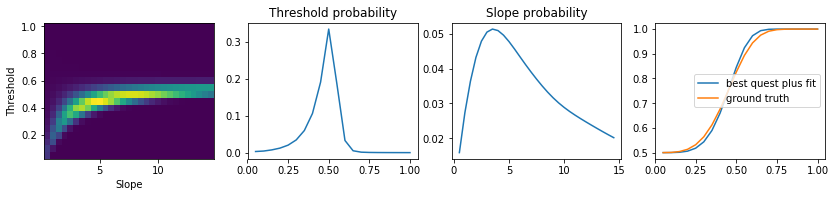

In [13]:
plot_qp(qp, [threshold, slope])

C:\proj\src\QuestPlus\quest_plus.py:109: RuntimeWarning: divide by zero encountered in log
  H = -np.nansum(full_posterior * np.log(full_posterior), axis=1)
C:\proj\src\QuestPlus\quest_plus.py:109: RuntimeWarning: invalid value encountered in multiply
  H = -np.nansum(full_posterior * np.log(full_posterior), axis=1)


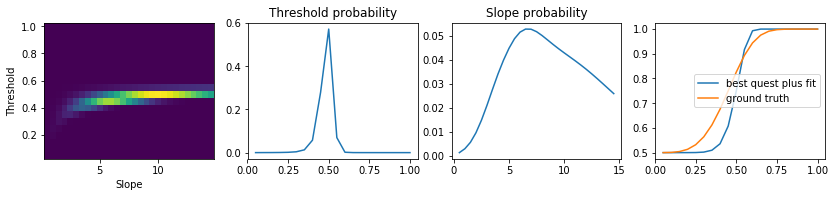

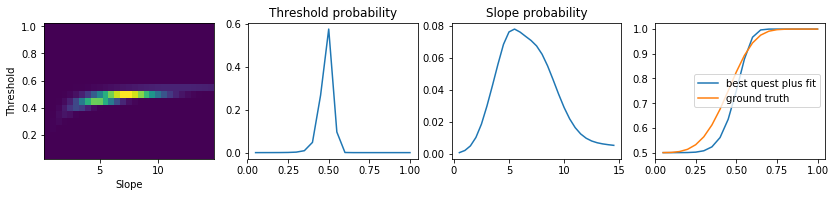

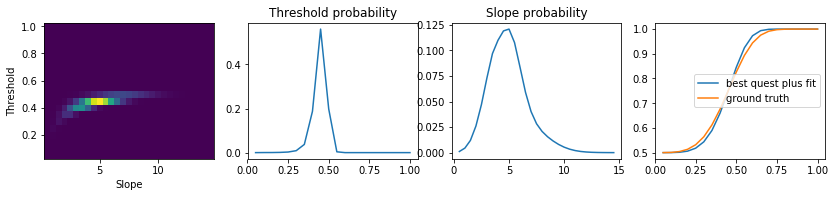

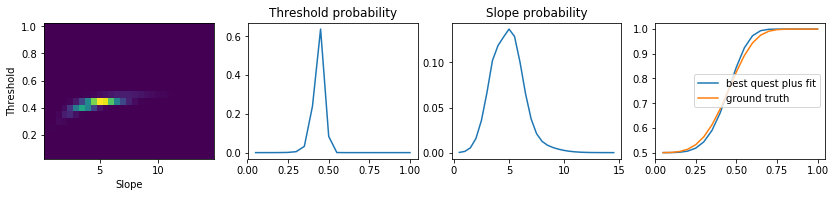

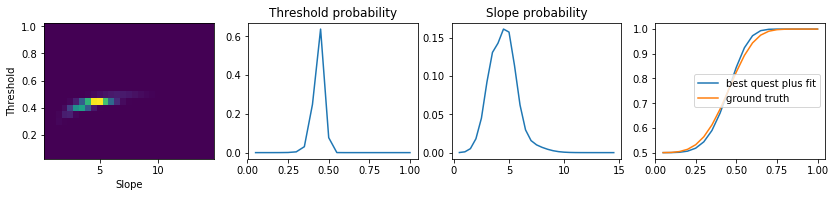

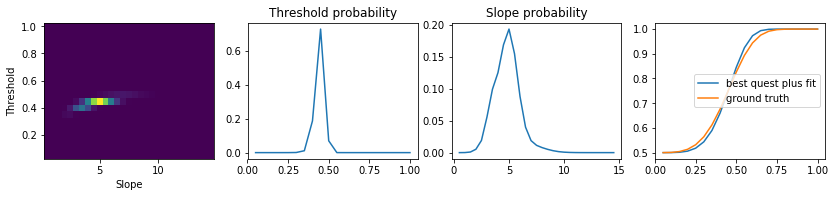

In [14]:
# plot every 25 trials:
for _ in range(6):
    for trial in range(25):
        response = draw_from(contrast, [threshold, slope])
        qp.update(contrast, response)
        contrast = qp.next_contrast()
    plot_qp(qp, [threshold, slope])

In [15]:
print('found params:', qp.get_fit_params())
print('true params:', [threshold, slope])

found params: [0.45 5.  ]
true params: [0.45, 4.0]
